<a href="https://colab.research.google.com/github/mandesai/SciforTechnologies/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks From scratch:

## perceptron algorithm is a foundational concept in neural networks.

A perceptron consists of:

1. Input values (features)
2. Weights associated with each input
3. A bias term
4. An activation function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

In [2]:
class Perceptron:

    def __init__(self, add_bias=True, max_iters=10000, record_updates=False):
        self.max_iters = max_iters
        self.add_bias = add_bias
        self.record_updates = record_updates
        if record_updates:
            self.w_hist = []
            self.n_hist = []

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        w = np.zeros(D)
        if self.record_updates:
            w_hist = [w]
        y = 2*y - 1
        t = 0
        change = True
        while change and t < self.max_iters:
            change = False
            for n in np.random.permutation(N):
                yh = np.sign(np.dot(x[n,:], w))
                if yh == y[n]:
                    continue
                w = w + y[n]*x[n,:]
                if self.record_updates:
                    self.w_hist.append(w)
                    self.n_hist.append(n)
                change = True
                t += 1
                if t >= self.max_iters:
                    break
        if change:
            print(f'did not converge after {t} updates')
        else:
            print(f'converged after {t} iterations!')
        self.w = w
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = np.sign(np.dot(self.w, x))
        return (yh + 1)//2

Apply binary classification with Iris flowers dataset.
Here, we choose the labels and two features to make the task linearly separable.

In [3]:
from sklearn import datasets
dataset = datasets.load_iris()
x, y = dataset['data'][:,2:], dataset['target']
x, y = x[y < 2, :], y[y< 2]

model = Perceptron(record_updates=True)
yh = model.fit(x,y)

converged after 3 iterations!


Plot the decision bounday.

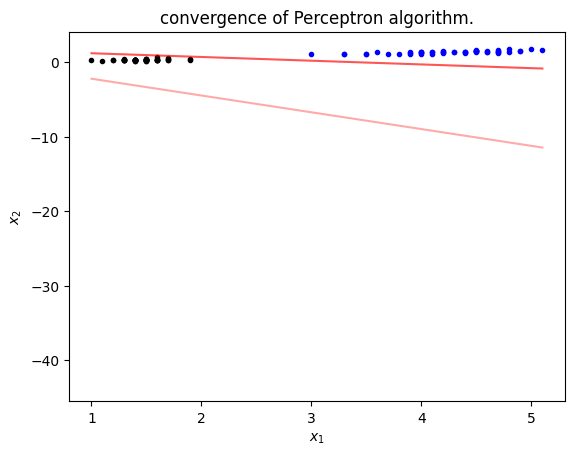

In [4]:
plt.plot(x[y==0,0], x[y==0,1], 'k.' )
plt.plot(x[y==1,0], x[y==1,1], 'b.' )
x_line = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 100)
for t,w in enumerate(model.w_hist):
    coef = -w[0]/w[1]
    plt.plot(x_line, coef*x_line - w[2]/w[1], 'r-',
             alpha=t/len(model.w_hist), label=f't={t}')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('convergence of Perceptron algorithm.')
plt.show()

In [5]:
dataset = datasets.load_iris()
x, y = dataset['data'][:,:], dataset['target']
print(x.shape)

(150, 4)


Here data is not linearly separable.

did not converge after 10000 updates


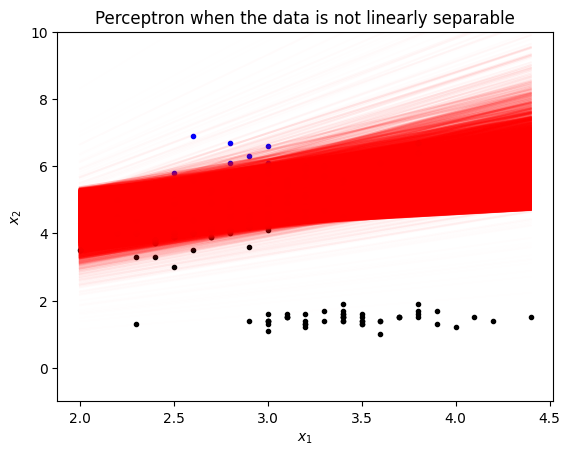

In [6]:
dataset = datasets.load_iris()
x, y = dataset['data'][:,[1,2]], dataset['target']
y =  y > 1
model = Perceptron(record_updates=True)
yh = model.fit(x,y)
plt.plot(x[y==0,0], x[y==0,1], 'k.' )
plt.plot(x[y==1,0], x[y==1,1], 'b.' )
x_line = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 100)
for t,w in enumerate(model.w_hist):
    coef = -w[0]/w[1]
    plt.plot(x_line, coef*x_line - w[2]/w[1], 'r-', alpha=t/len(model.w_hist), label=f't={t}')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.ylim(-1,10)
plt.title('Perceptron when the data is not linearly separable')
plt.show()